# Data Analytics Final Project

Data analysis for the food_cleaned.csv dataset

### Project Setup

In [1]:
# import built in libraries for handling files and data
import io
import os
import random

# import libraries for data analysis
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# define constants
FILE_PATH = os.path.join(os.getcwd(), "material/data", "food_cleaned.csv")


In [2]:
# import dataset from csv file
food = pd.read_csv(FILE_PATH)

# replace null values in type sports
food['type_sports'] = food['type_sports'].fillna('NoSport')

# view sample
food.head()

,gpa,gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,3.0,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,NoSport,5,1,1315,187.0
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,NoSport,4,2,900,155.0
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,NoSport,5,1,900,155.0
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,Baseball,3,1,1315,155.0
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190.0


### Exploratory Data Analysis

<span style="color:green">You can view material/data_report_clean.txt for a summary report generated by the jupyter notebook named 01_data_cleaner.ipynb</span>

In [3]:
# summarize the cleaned cafeteria data
print("\nDescriptive Statistics:\n")
print(food.describe())


Descriptive Statistics:

              gpa      gender   breakfast  calories_chicken  calories_day  \
count  125.000000  125.000000  125.000000        125.000000    125.000000   
mean     3.418936    1.392000    1.112000        577.320000      3.024000   
std      0.382553    0.490161    0.316636        131.214156      0.588382   
min      2.200000    1.000000    1.000000        265.000000      2.000000   
25%      3.200000    1.000000    1.000000        430.000000      3.000000   
50%      3.500000    1.000000    1.000000        610.000000      3.000000   
75%      3.700000    2.000000    1.000000        720.000000      3.000000   
max      4.000000    2.000000    2.000000        720.000000      4.000000   

       calories_scone     coffee  comfort_food_reasons_coded        cook  \
count      125.000000  125.00000                  125.000000  125.000000   
mean       504.560000    1.75200                    3.656000    2.792000   
std        230.034198    0.43359                    

In [4]:
# extract columns with object datatype
object_columns = food.select_dtypes(include=['object']).columns

# generate report for unique values in columns with object datatype
# make sure to ALT + Z to wrap output file when viewing
with open("material/unique_text_inputs.txt", "w") as file:
    for col in object_columns:
        unique_values = food[col].unique()
        file.write(f"Unique values in {col}:\n{', '.join(map(str, unique_values))}\n\n")
    print("Object column unique values written to 'material/unique_text_inputs.txt'.")

Object column unique values written to 'material/unique_text_inputs.txt'.


#### 0: type_sports exploration (independent study)

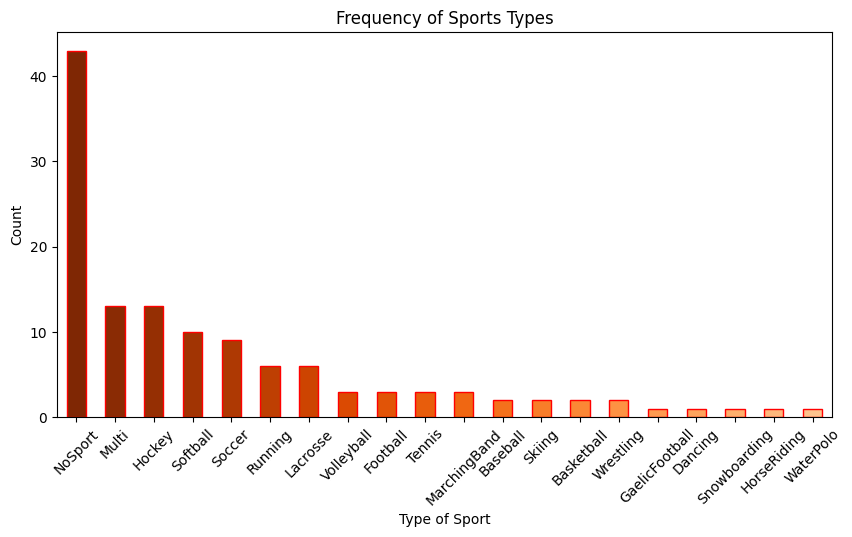

In [5]:
plt.figure(figsize=(10, 5))
#food['type_sports'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
food['type_sports'].value_counts().plot(kind='bar', 
    color=plt.cm.Oranges(np.linspace(1, 0.3, len(food['type_sports'].value_counts()))), 
    edgecolor='red') # <- Looked up the gradient across the bars, cool stuff
plt.title('Frequency of Sports Types')
plt.xlabel('Type of Sport')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

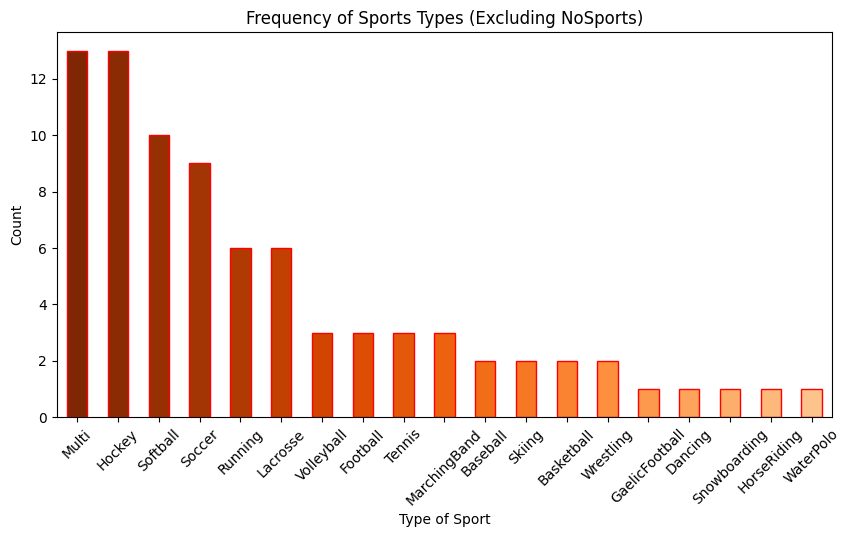

In [6]:
YesSports = food['type_sports'][food['type_sports'] != 'NoSport']

plt.figure(figsize=(10, 5))
YesSports.value_counts().plot(kind='bar', 
    color=plt.cm.Oranges(np.linspace(1, 0.3, len(YesSports.value_counts()))), 
    edgecolor='red')
plt.title('Frequency of Sports Types (Excluding NoSports)')
plt.xlabel('Type of Sport')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

I remembered the .loc[] slicing from the Murach's Python for Data Analysis
The examples in there weren't exactly doing what I was imagining.
Spent about 15 minutes looking at examples of .loc[] and trying to code this myself.
That did not work. 
This is my second ChatGpt cell. 

It took several messages to dial in something that was close, and then like usual,
I had to fix things, reorder things, correct the naming of variables, etc.

Here is the message that got things going:

I'd like to create a graph that shows you the percent of men who play any sport (vs 'NoSport') 
and women who play any sport (vs NoSport). I am using a dataframe called 'food' and gender and 
type_sports are the relevant fields. there should be four values: gender=1(woman) and 
type_sports = 'NoSport',  gender=1(woman) and type_sports != 'NoSport', gender=2(man) and 
type_sports = 'NoSport',  gender=2(man) and type_sports != 'NoSport', i would like to visualize 
the % of each in the total dataset. try to achieve this using the .loc[] accessor to take slices
of the food dataframe that represent the four values I described above.

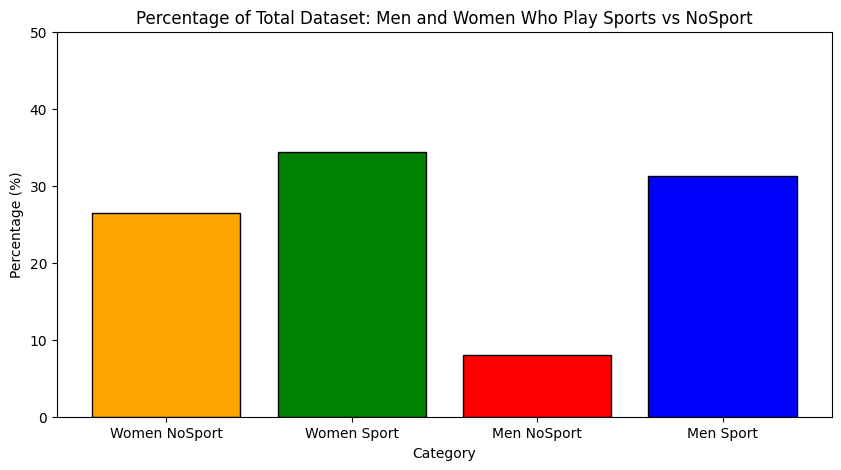

In [7]:
sport_counts = food.groupby(['gender', 'type_sports']).size().unstack(fill_value=0)
women_total = sport_counts.loc[1].sum()
men_total = sport_counts.loc[2].sum()
total = len(food)

percentages = {
    'Women NoSport': (sport_counts.loc[1, 'NoSport'] / total) * 100,
    'Women Sport': ((sport_counts.loc[1].sum() - sport_counts.loc[1, 'NoSport']) / total) * 100,
    'Men NoSport': (sport_counts.loc[2, 'NoSport'] / total) * 100,
    'Men Sport': ((sport_counts.loc[2].sum() - sport_counts.loc[2, 'NoSport']) / total) * 100
}

categories = list(percentages.keys())
values = list(percentages.values())
plt.figure(figsize=(10, 5))
plt.bar(categories, values, color=['orange', 'green', 'red', 'blue'], edgecolor='black')
plt.title('Percentage of Total Dataset: Men and Women Who Play Sports vs NoSport')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.ylim(0, 50) 
plt.show()


#### 1: How health concsious are your students?

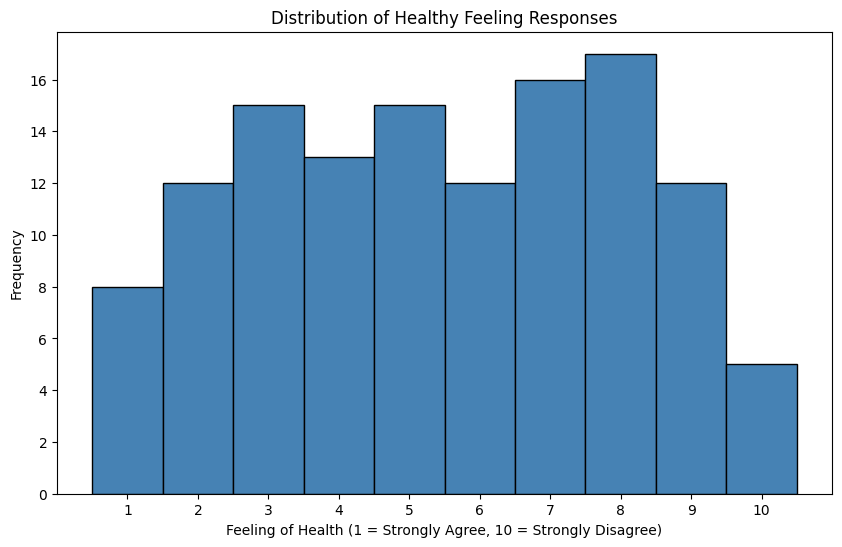

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(food['healthy_feeling'], bins=np.arange(1, 12) - 0.5, edgecolor='black', color='steelblue')
plt.title('Distribution of Healthy Feeling Responses')
plt.xlabel('Feeling of Health (1 = Strongly Agree, 10 = Strongly Disagree)')
plt.ylabel('Frequency')
plt.xticks(np.arange(1, 11))

plt.show()

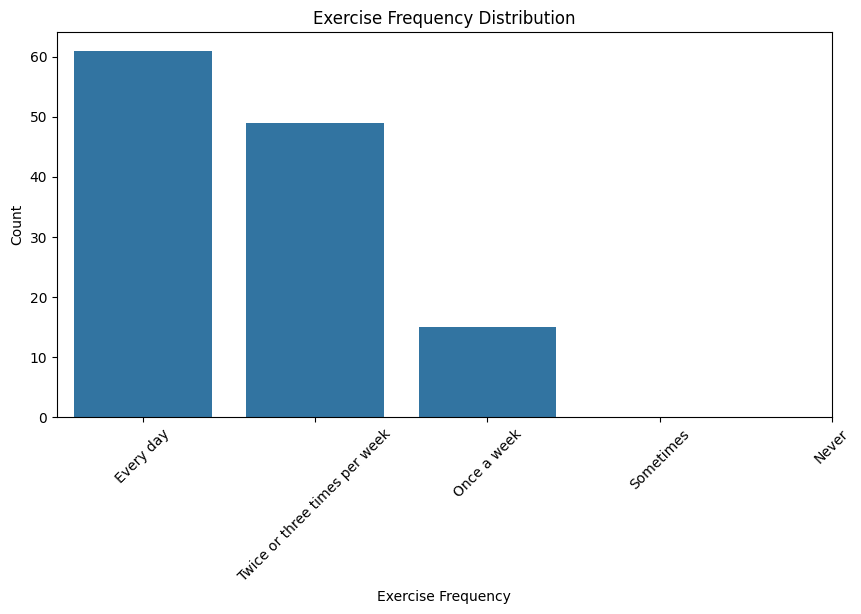

In [9]:
exercise_labels = {
    1: "Every day",
    2: "Twice or three times per week",
    3: "Once a week",
    4: "Sometimes",
    5: "Never"
}

plt.figure(figsize=(10, 5))
sns.countplot(data=food, x='exercise')
plt.xticks(ticks=range(5), labels=[exercise_labels[i] for i in range(1, 6)], rotation=45)

plt.title("Exercise Frequency Distribution")
plt.xlabel("Exercise Frequency")
plt.ylabel("Count")
plt.show()

<span style="color:red">I can't figure out how to get it to put space to the right of an empty bar.</span>

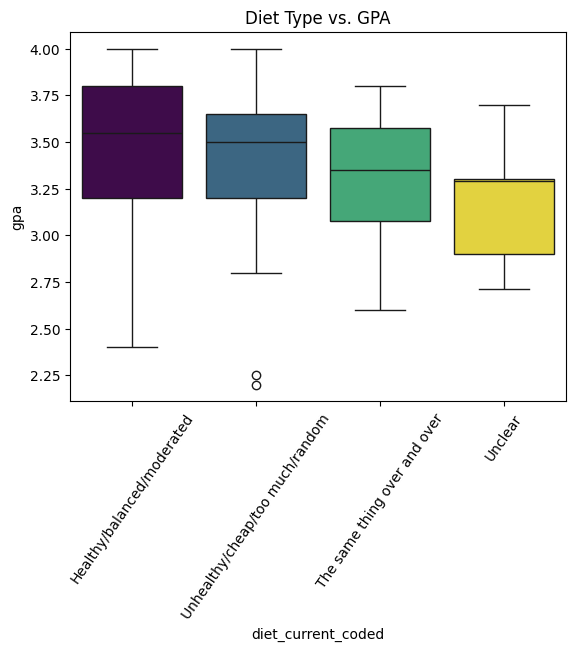

In [10]:
diet_current_labels = {
    1: "Healthy/balanced/moderated",
    2: "Unhealthy/cheap/too much/random",
    3: "The same thing over and over",
    4: "Unclear"
}

sns.boxplot(
    data=food, 
    x='diet_current_coded', 
    y='gpa', 
    hue='diet_current_coded', 
    palette='viridis',
    legend=False
)
plt.xticks(ticks=[0, 1, 2, 3], labels=[diet_current_labels[i] for i in range(1, 5)], rotation=55)
plt.title("Diet Type vs. GPA")
plt.show()

#### 2: Have students’ eating habits changed since they came to college?  
* For those who said habits got worse, what were the top two most reported changes?  
* For those who said habits got better, what were the top two most reported changes?  

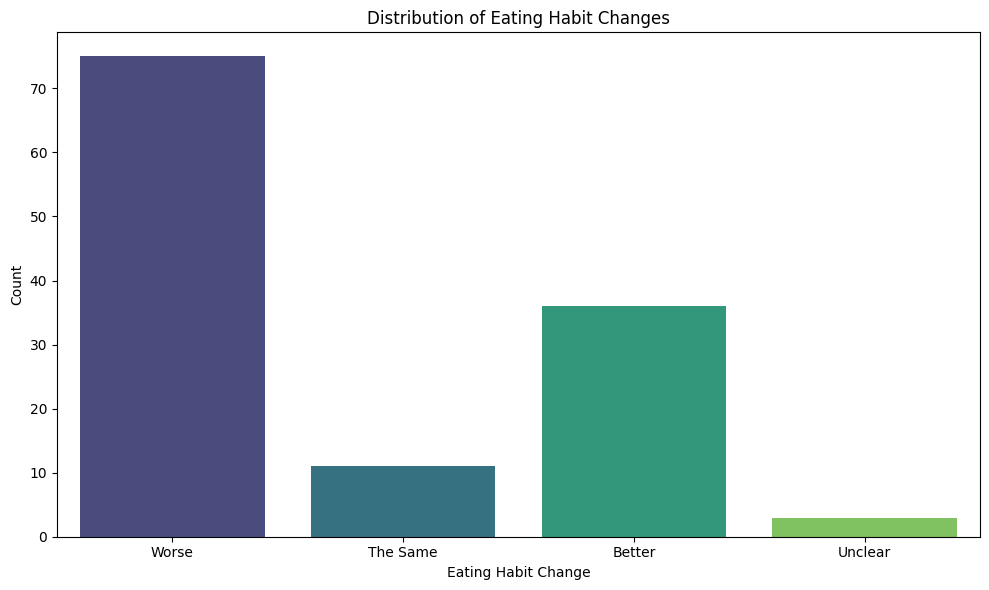

In [11]:
food['eating_changes_label'] = food['eating_changes_coded'].map({
    1: "Worse",
    2: "Better",
    3: "The Same",
    4: "Unclear"
})

plt.figure(figsize=(10, 6))
sns.countplot(
    x='eating_changes_label', 
    data=food, 
    hue='eating_changes_label',
    palette='viridis'
)
plt.title('Distribution of Eating Habit Changes')
plt.xlabel('Eating Habit Change')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

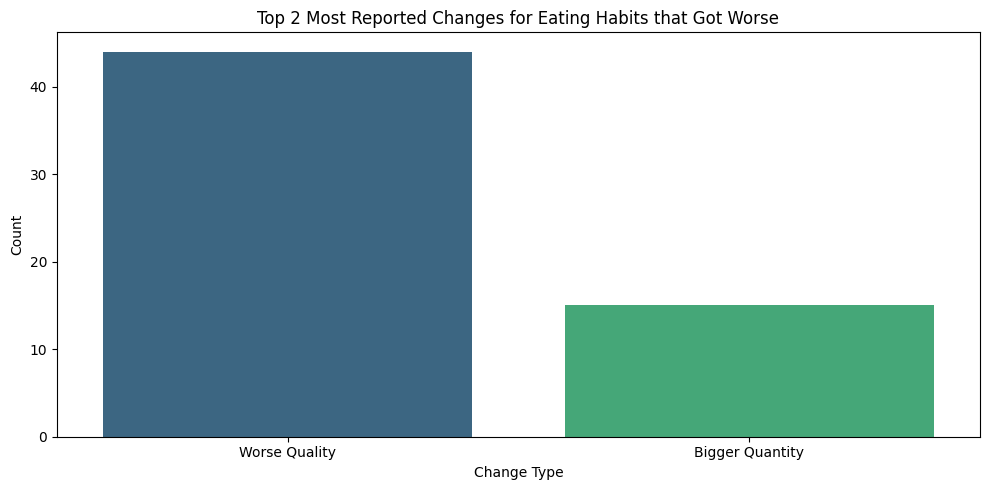

In [12]:
worse_changes = food[food['eating_changes_coded'] == 1]['eating_changes_coded1'].map({
    1: "Eat Faster",
    2: "Bigger Quantity",
    3: "Worse Quality",
    4: "Same Food",
    5: "Healthier",
    6: "Unclear",
    7: "Drink Coffee",
    8: "Less Food",
    9: "More Sweets",
    10: "Timing",
    11: "More Carbs or Snacking",
    12: "Drink More Water",
    13: "More Variety"
})

top_worse_changes = worse_changes.value_counts().nlargest(2)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_worse_changes.index, y=top_worse_changes.values, hue=top_worse_changes.index, palette='viridis')
plt.title('Top 2 Most Reported Changes for Eating Habits that Got Worse')
plt.xlabel('Change Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

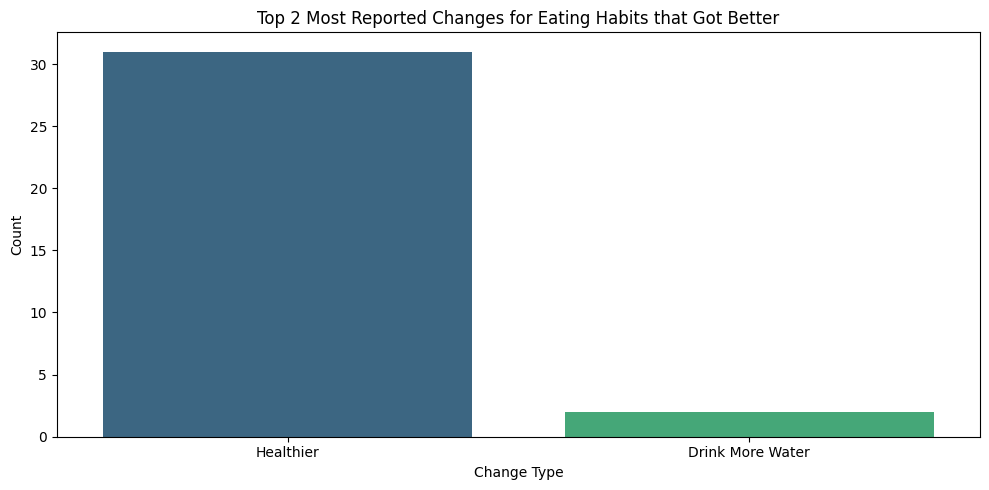

In [13]:
better_changes = food[food['eating_changes_coded'] == 2]['eating_changes_coded1'].map({
    1: "Eat Faster",
    2: "Bigger Quantity",
    3: "Worse Quality",
    4: "Same Food",
    5: "Healthier",
    6: "Unclear",
    7: "Drink Coffee",
    8: "Less Food",
    9: "More Sweets",
    10: "Timing",
    11: "More Carbs or Snacking",
    12: "Drink More Water",
    13: "More Variety"
})

top_better_changes = better_changes.value_counts().nlargest(2)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_better_changes.index, y=top_better_changes.values, hue=top_better_changes.index, palette='viridis')
plt.title('Top 2 Most Reported Changes for Eating Habits that Got Better')
plt.xlabel('Change Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

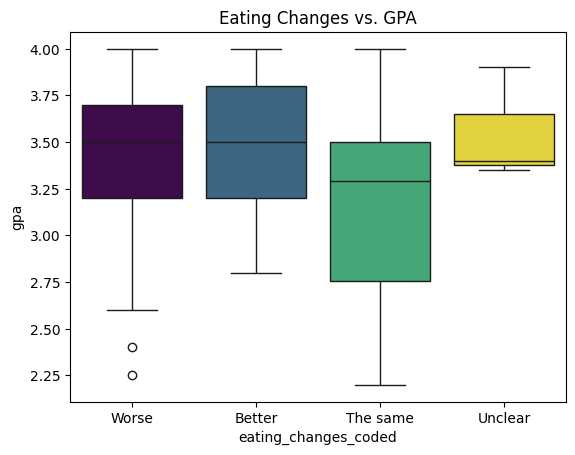

In [14]:
eating_changes_labels = {
    1: "Worse",
    2: "Better",
    3: "The same",
    4: "Unclear"
}

sns.boxplot(data=food, x='eating_changes_coded', y='gpa', hue='eating_changes_coded', palette='viridis', legend=False)
plt.xticks(ticks=range(4), labels=[eating_changes_labels[i] for i in range(1, 5)])
plt.title("Eating Changes vs. GPA")
plt.show()

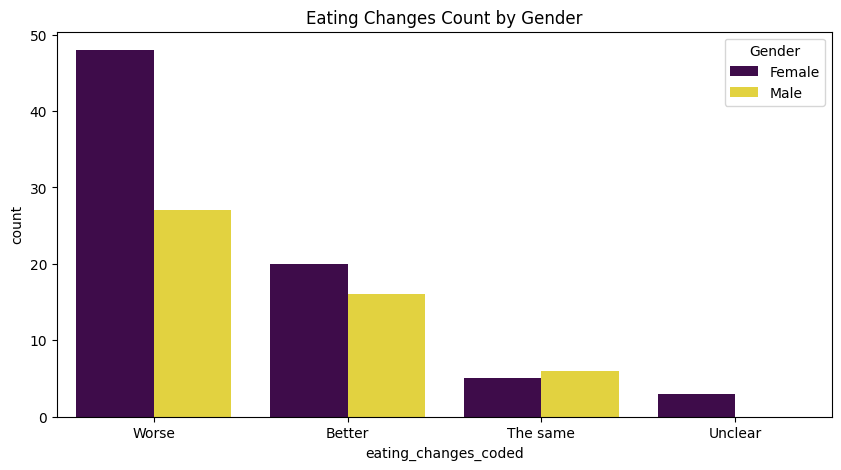

In [15]:
gender_labels = {
    1: "Female",
    2: "Male"
}

plt.figure(figsize=(10, 5))
sns.countplot(data=food, x='eating_changes_coded', hue='gender', palette='viridis')
plt.xticks(ticks=range(4), labels=[eating_changes_labels[i] for i in range(1, 5)])
plt.legend(title='Gender', labels=[gender_labels[1], gender_labels[2]])
plt.title("Eating Changes Count by Gender")
plt.show()

#### 3: If you offered ethnic food in your cafeteria, would students be likely to eat it?  If so, what is the most popular cuisine?

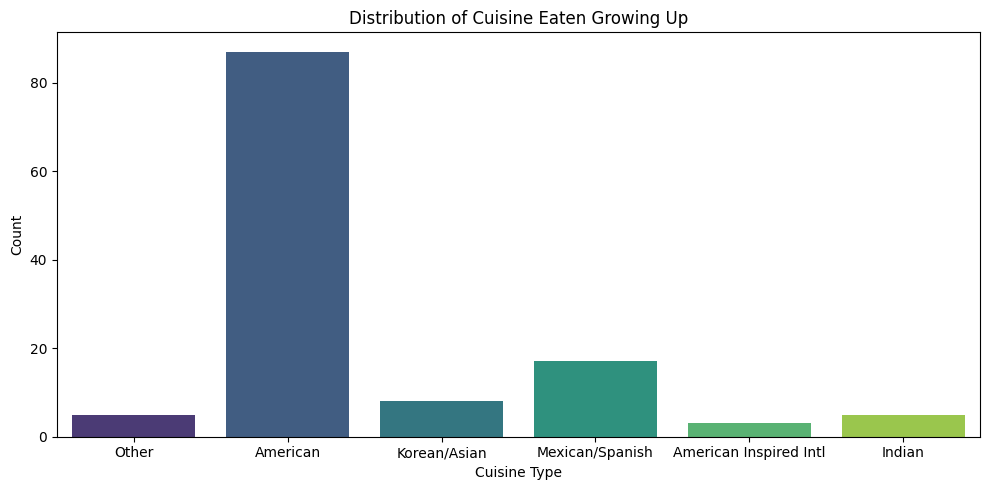

In [16]:
food['cuisine_label'] = food['cuisine'].map({
    1: "American",
    2: "Mexican/Spanish",
    3: "Korean/Asian",
    4: "Indian",
    5: "American Inspired Intl",
    6: "Other"
})

plt.figure(figsize=(10, 5))
sns.countplot(
    x='cuisine_label', 
    data=food, 
    hue='cuisine_label', 
    palette='viridis'
)
plt.title('Distribution of Cuisine Eaten Growing Up')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

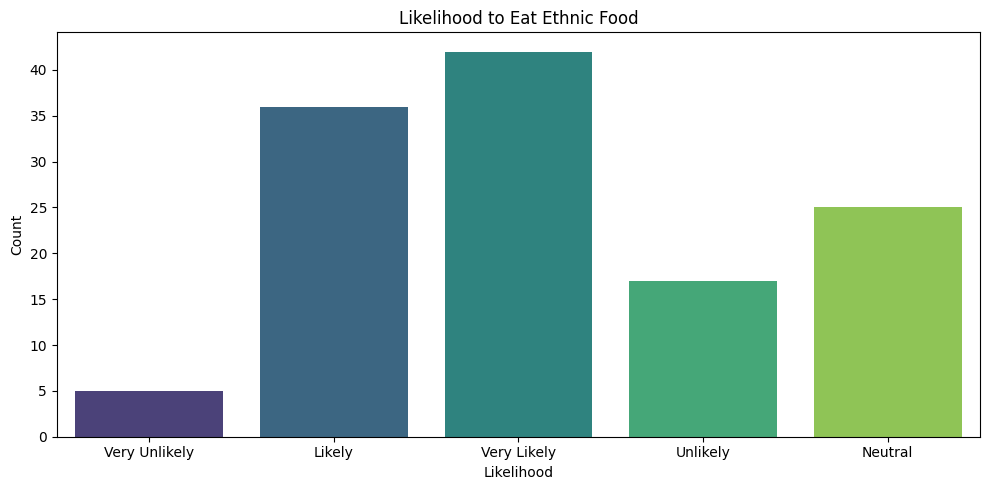

In [17]:
food['ethnic_food_label'] = food['ethnic_food'].map({
    1: "Very Unlikely",
    2: "Unlikely",
    3: "Neutral",
    4: "Likely",
    5: "Very Likely"
})

plt.figure(figsize=(10, 5))
sns.countplot(
    x='ethnic_food_label', 
    data=food, 
    hue='ethnic_food_label', 
    palette='viridis'
)
plt.title('Likelihood to Eat Ethnic Food')
plt.xlabel('Likelihood')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

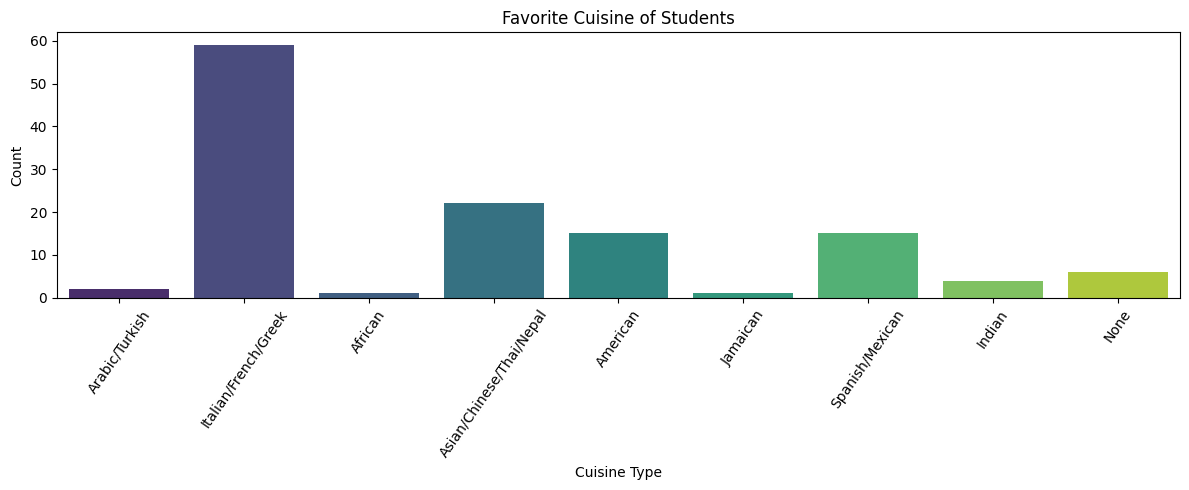

In [18]:
food['fav_cuisine_label'] = food['fav_cuisine_coded'].map({
    0: "None",
    1: "Italian/French/Greek",
    2: "Spanish/Mexican",
    3: "Arabic/Turkish",
    4: "Asian/Chinese/Thai/Nepal",
    5: "American",
    6: "African",
    7: "Jamaican",
    8: "Indian"
})

plt.figure(figsize=(12, 5))
sns.countplot(
    x='fav_cuisine_label', 
    data=food, 
    hue='fav_cuisine_label', 
    palette='viridis'
)
plt.title('Favorite Cuisine of Students')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

<span style="color:red">Will be skipping How Likely are you to eat {ethnic} food? columns due to time</span>

#### 4:	You’d also like to offer some comfort foods for your students.  What are the 5 most popular comfort foods? comfort_food 

R STUDIO TEXT ANALYSIS

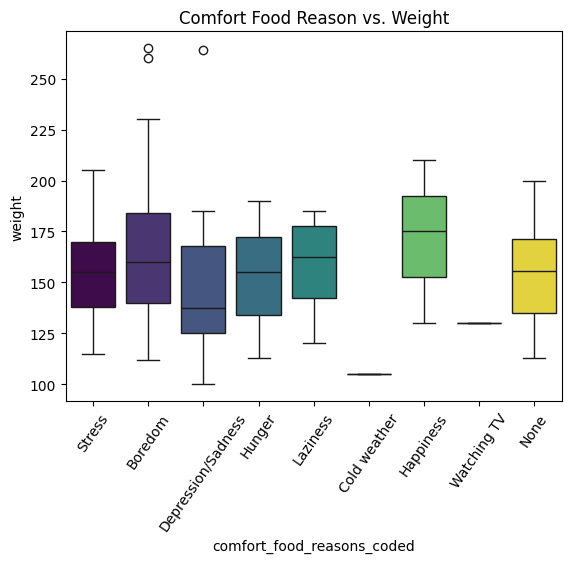

In [19]:
# independent study
comfort_food_reasons_labels = {
    1: "Stress",
    2: "Boredom",
    3: "Depression/Sadness",
    4: "Hunger",
    5: "Laziness",
    6: "Cold weather",
    7: "Happiness",
    8: "Watching TV",
    9: "None"
}

sns.boxplot(data=food, 
            x='comfort_food_reasons_coded', 
            y='weight', 
            hue='comfort_food_reasons_coded', 
            palette='viridis', 
            legend=False
)
plt.xticks(ticks=range(9), labels=[comfort_food_reasons_labels[i] for i in range(1, 10)], rotation=55)
plt.title("Comfort Food Reason vs. Weight")
plt.show()

#### 5: You also want to bring some nostalgia to your cafeteria.  What were your students top 5 childhood favorites? food_childhood 

R STUDIO TEXT ANALYSIS

#### 6: Should you offer fruit in the cafeteria?  |  7: Should you offer vegetables in the cafeteria?

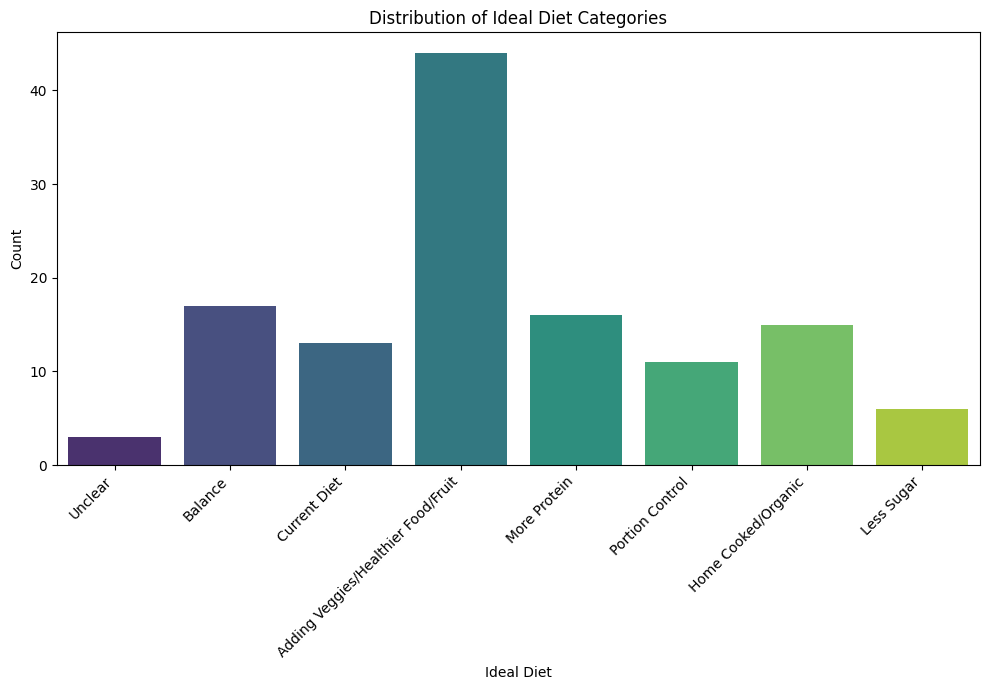

In [20]:
food['ideal_diet_label'] = food['ideal_diet_coded'].map({
    1: "Portion Control",
    2: "Adding Veggies/Healthier Food/Fruit",
    3: "Balance",
    4: "Less Sugar",
    5: "Home Cooked/Organic",
    6: "Current Diet",
    7: "More Protein",
    8: "Unclear"
})

plt.figure(figsize=(10, 7))
sns.countplot(
    x='ideal_diet_label', 
    data=food, 
    hue='ideal_diet_label',
    palette='viridis'
)

plt.title("Distribution of Ideal Diet Categories")
plt.xlabel("Ideal Diet")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


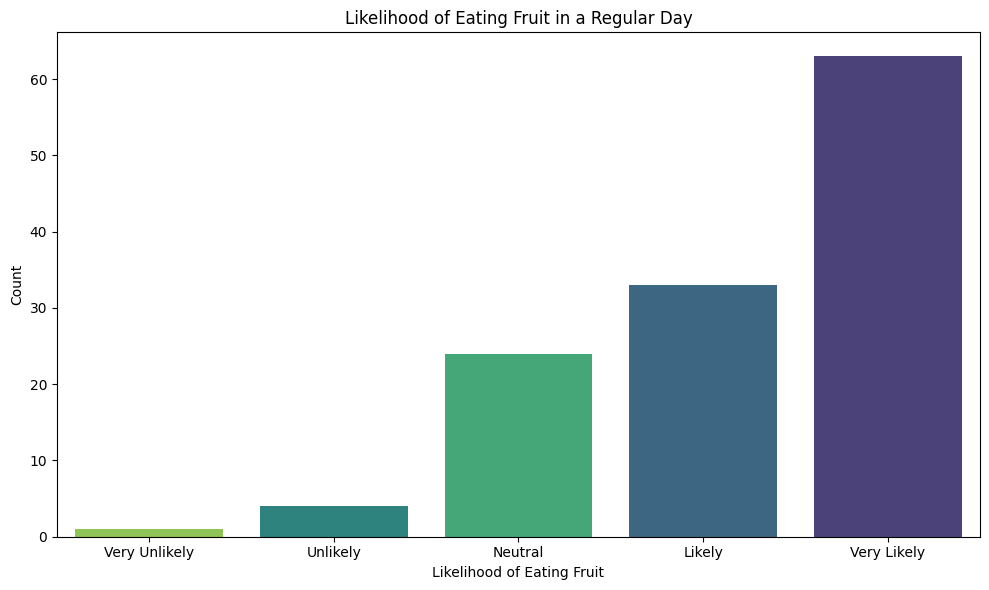

In [21]:
food['fruit_day_label'] = food['fruit_day'].map({
    1: "Very Unlikely",
    2: "Unlikely",
    3: "Neutral",
    4: "Likely",
    5: "Very Likely"
})

plt.figure(figsize=(10, 6))
sns.countplot(
    x='fruit_day_label', 
    data=food, 
    hue='fruit_day_label', 
    palette='viridis',
    order=["Very Unlikely", "Unlikely", "Neutral", "Likely", "Very Likely"],
)
plt.title('Likelihood of Eating Fruit in a Regular Day')
plt.xlabel('Likelihood of Eating Fruit')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

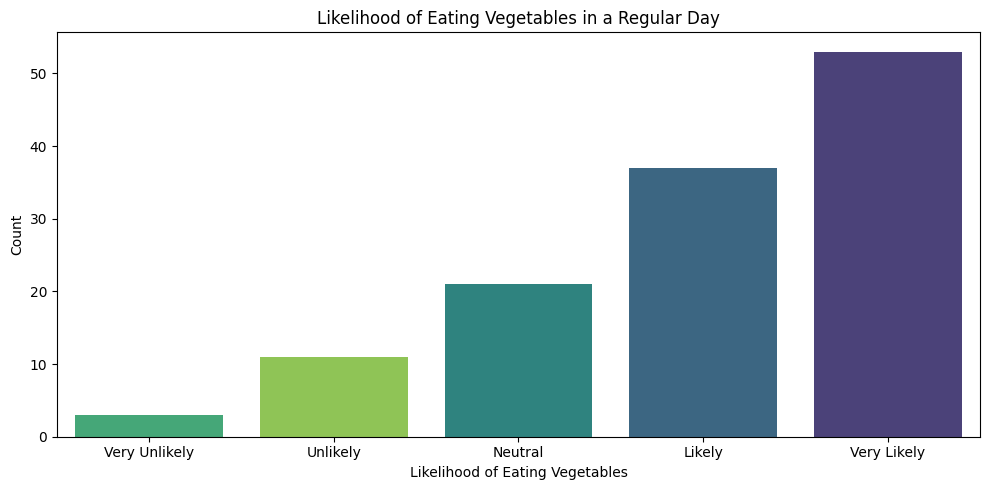

In [22]:
food['veggies_day_label'] = food['veggies_day'].map({
    1: "Very Unlikely",
    2: "Unlikely",
    3: "Neutral",
    4: "Likely",
    5: "Very Likely"
})

plt.figure(figsize=(10, 5))
sns.countplot(
    x='veggies_day_label', 
    data=food,
    hue='veggies_day_label', 
    order=["Very Unlikely", "Unlikely", "Neutral", "Likely", "Very Likely"],
    palette='viridis'
)
plt.title('Likelihood of Eating Vegetables in a Regular Day')
plt.xlabel('Likelihood of Eating Vegetables')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### 9: Do enough students live on campus who would come to your cafeteria?

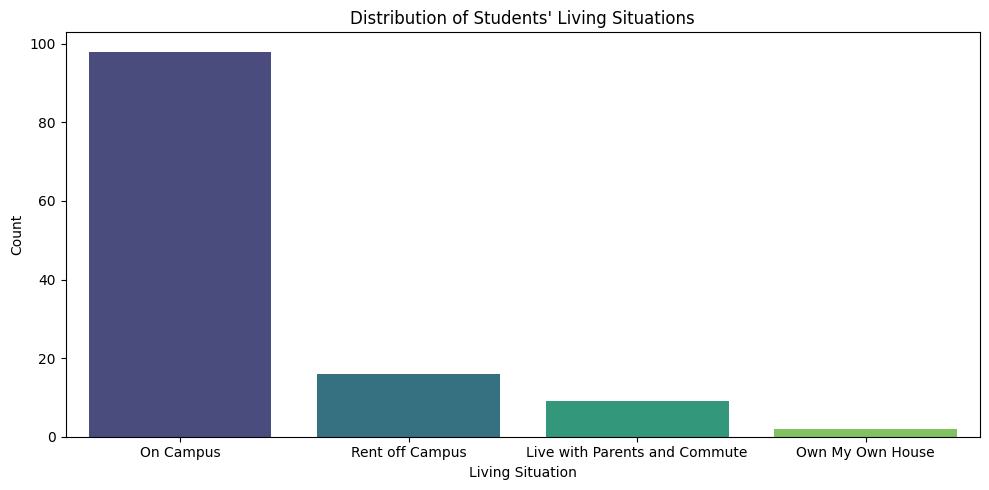

In [23]:
food['on_off_campus_label'] = food['on_off_campus'].map({
    1: "On Campus",
    2: "Rent off Campus",
    3: "Live with Parents and Commute",
    4: "Own My Own House"
})

plt.figure(figsize=(10, 5))
sns.countplot(
    x='on_off_campus_label', 
    data=food, 
    hue='on_off_campus_label', 
    palette='viridis'
)
plt.title('Distribution of Students\' Living Situations')
plt.xlabel('Living Situation')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### 10: Based on what your students are willing to pay for a meal out, how should your price your meals?

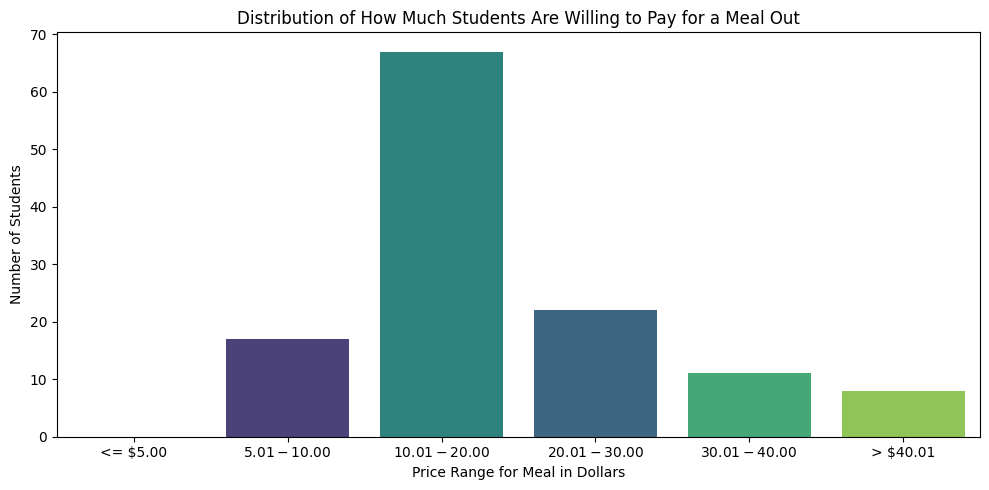

In [24]:
food['pay_meal_out_label'] = food['pay_meal_out'].map({
    1: "<= $5.00",
    2: "$5.01 - $10.00",
    3: "$10.01 - $20.00",
    4: "$20.01 - $30.00",
    5: "$30.01 - $40.00",
    6: "> $40.01"
})

order = ["<= $5.00", "$5.01 - $10.00", "$10.01 - $20.00", "$20.01 - $30.00", "$30.01 - $40.00", "> $40.01"]

plt.figure(figsize=(10, 5))
sns.countplot(
    x='pay_meal_out_label', 
    data=food, 
    hue='pay_meal_out_label', 
    palette='viridis',
    order=order
)
plt.title('Distribution of How Much Students Are Willing to Pay for a Meal Out')
plt.xlabel('Price Range for Meal in Dollars')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

<hr style="color:red">

### Giving up on R. 

In [25]:
# new setup
file_path = 'material/data/tokens.csv'
df = pd.read_csv(file_path)
df.head()

,comfort_food_clean
0,chocolate
1,chips
2,ice cream
3,frozen yogurt
4,pizza


In [26]:
value_counts = df['comfort_food_clean'].value_counts()
print(value_counts)

comfort_food_clean
ice cream                   42
pizza                       37
chocolate                   25
chips                       23
cookies                     17
                            ..
pizza  wings  cheesecake     1
potato                       1
seaweed soup                 1
chocolates                   1
and ritz                     1
Name: count, Length: 161, dtype: int64


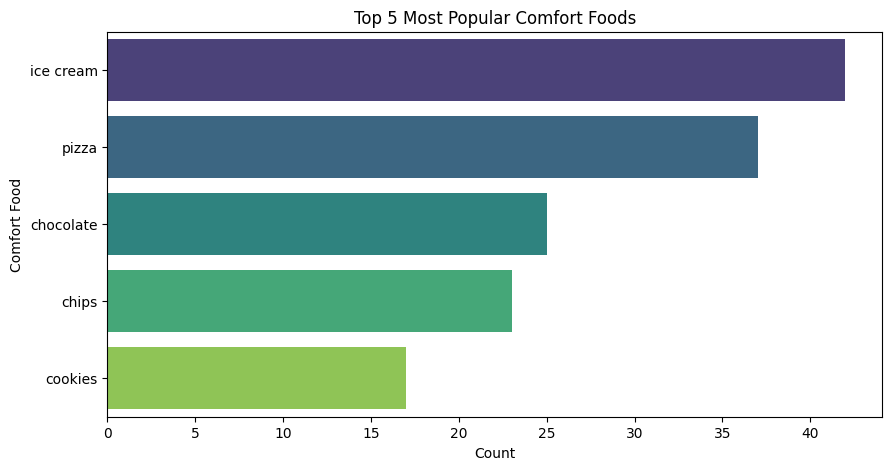

In [27]:
top_5_foods = value_counts.head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_foods.values, y=top_5_foods.index, hue=top_5_foods.index, palette="viridis")
plt.xlabel('Count')
plt.ylabel('Comfort Food')
plt.title('Top 5 Most Popular Comfort Foods')
plt.show()
